# Basic Classification With DNN

To classify 10 kinds of different clothes with DNN

## 1. Import necessary libraries

In [1]:
print("Importing……")

# import Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, AveragePooling2D, MaxPooling2D, ZeroPadding2D
from tensorflow.python.keras.layers.core import Activation, Flatten, Dense, Dropout
from tensorflow.python.keras.layers import Input, add
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.regularizers import l2
from tensorflow.python.keras.initializers import glorot_uniform
from tensorflow.python.keras.utils.vis_utils import plot_model

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py

print("Import complete!\n")
print("Checking Tensorflow version:")
# Check Tensorflow version
print(tf.__version__)

Importing……
Import complete!

Checking Tensorflow version:
2.0.0


## 2. Load MNIST data

In [2]:
# import the Fashion MNIST dataset
print("Loading train and test data……\n")
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("Loading complete!")

Loading train and test data……

Loading complete!


## 3. Preprocessing

In [3]:
# Feature scaling
print("Scaling the feature.")
train_images = train_images / 255.0

test_images = test_images / 255.0

Scaling the feature.


## 4. Build the training model

In [4]:
# Build the training model(DNN)
print("Start to build the model……\n")
model = keras.Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

print("Build complete!\n")
# look through the summary of the model
print("Summary of the model:")
print(model.summary())

Start to build the model……

Build complete!

Summary of the model:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


## 5. Compile the model

In [5]:
print("Compiling……")
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print("Compiling complete!")

Compiling……
Compiling complete!


## 6. Train the model

In [6]:
# Train the model
print("Training:")
model.fit(train_images, train_labels, epochs=50)
print("Training complete!")

Training:
Train on 60000 samples
Epoch 1/35
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4898 - accuracy: 0.8235
Epoch 2/35
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3660 - accuracy: 0.8656
Epoch 3/35
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3297 - accuracy: 0.8787
Epoch 4/35
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3076 - accuracy: 0.8865
Epoch 5/35
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2909 - accuracy: 0.8924
Epoch 6/35
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2748 - accuracy: 0.8968
Epoch 7/35
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2616 - accuracy: 0.9021
Epoch 8/35
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2510 - accuracy: 0.9062
Epoch 9/35
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2380 - accuracy: 0.9099
Epo

## 7. Evaluate the model

In [7]:
# Evaluate accuracy
print("Evaluating:")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest loss:", test_loss)
print('\nTest accuracy:', test_acc)

Evaluating:
10000/1 - 1s - loss: 0.4058 - accuracy: 0.8855

Test loss: 0.5237712634660303

Test accuracy: 0.8855


## 8. Save the model

In [8]:
# Save model
print("Saving model to disk…… \n")
mp = "./DNN.h5"
model.save(mp)
print("Complete!\n")

Saving model to disk…… 

Complete!



## 9. Exploring the model

In [9]:
# Path of model
MODEL_PATH = './DNN.h5'

# Reading model
print("Reading model:")
with h5py.File(MODEL_PATH, 'r') as f:
    dense = f['/model_weights/dense/dense']
    dense_bias = dense['bias:0'][0]
    dense_kernel = dense['kernel:0'][:]

    dense_1 = f['/model_weights/dense_1/dense_1']
    dense_1_bias = dense_1['bias:0'][0]
    dense_1_kernel = dense_1['kernel:0'][:]

    dense_2 = f['/model_weights/dense_2/dense_2']
    dense_2_bias = dense_2['bias:0'][0]
    dense_2_kernel = dense_2['kernel:0'][:]

print("Matrix of dense_0_bias：\n%s\n"%dense_bias)
print("Matrix of dense_0_kernel：\n%s\n"%dense_kernel)
print("Matrix of dense_1_bias：\n%s\n"%dense_1_bias)
print("Matrix of dense_1_kernel：\n%s\n"%dense_1_kernel)
print("Matrix of dense_2_bias：\n%s\n"%dense_2_bias)
print("Matrix of dense_2_kernel：\n%s\n"%dense_2_kernel)

Reading model:
Matrix of dense_0_bias：
-0.30588293

Matrix of dense_0_kernel：
[[-0.06126328 -0.26420972 -0.7573033  ...  0.06686068 -0.03709538
  -0.6339201 ]
 [-0.6535571   0.22620735  0.33299172 ...  0.04060664  0.22744986
   0.11327054]
 [-0.46511912 -0.00742143  1.039257   ... -0.00286163 -0.01239439
   0.51605195]
 ...
 [ 0.30919203  0.44670492  0.05175085 ...  0.0160092   0.37345383
  -0.25204143]
 [ 0.41380376  1.7785205   0.09842958 ... -0.04649356 -0.3217475
   0.16944611]
 [ 0.33247164  0.23127109  0.09589886 ... -0.08752138 -0.16429846
   0.01183998]]

Matrix of dense_1_bias：
0.87591803

Matrix of dense_1_kernel：
[[-0.11189537 -0.14782362 -0.03775683 ... -0.37657243 -0.15672597
   0.4255943 ]
 [-0.03500427 -0.42786273 -0.26593953 ...  0.19205493 -0.04159217
   0.27027848]
 [-0.43962175 -0.301487   -0.03702918 ... -0.3811503   0.02160005
   0.1292361 ]
 ...
 [ 0.13697617  0.11688976  0.14373423 ...  0.10198344  0.09362523
  -0.08248947]
 [-0.54632384  0.22889355  0.39851275 .

## 10. Save the image of the model

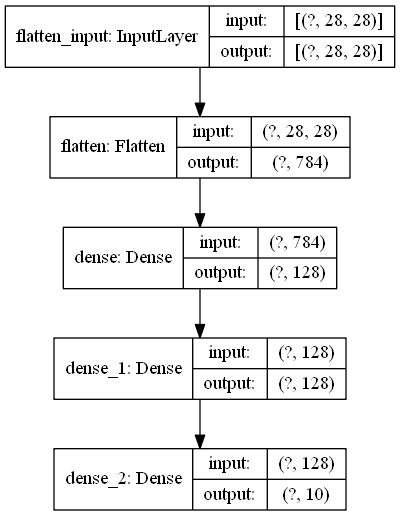

In [10]:
plot_model(model, 'DNN_model.png', show_shapes=True)